# Table of Contents

1) import libraries and data

2) prepare dataframe

3) elbow technique to find optimal number of clusters

4) k- means clustering

5) exploring results

6) Exporting data

### 1
import libraries and data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
import folium
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
#define path
path = r'C:\Users\Owner\Documents\Career Foundry\Tasks\Data Immersion Tasks\Traffic Project'

In [3]:
#import data
traffic = pd.read_csv(os.path.join(path, 'Data', 'Prepared', 'v4_data_post_lin_regression.csv'))

In [4]:
traffic.shape

(2543663, 51)

In [5]:
pd.options.display.max_columns = None
traffic.head()

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,start_date,start_time,time_of_day,acdnt_per_day,state,avg_state_sev,avg_state_temp,avg_state_rain,avg_state_acdnt_per_day,start_time_float
0,0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,29607-6027,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-05-21,08:29:55,Morning,1693,South Carolina,2.172651,64.663102,0.006040,64.104680,8.498611
1,1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,28270-8560,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-10-07,17:43:09,Evening,2450,North Carolina,2.147315,63.247137,0.006803,67.104506,17.719167
2,2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,95033,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,2020-12-13,21:53:00,Night,5467,California,2.182810,64.206544,0.003010,361.961450,21.883333
3,3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,89705,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,16.0,30.16,10.0,SSW,4.6,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,2018-04-17,16:51:23,Evening,1626,Nevada,2.346195,62.241654,0.001130,4.816372,16.856389
4,4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,33324,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,84.0,29.92,10.0,SSE,13.8,0.0,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,2016-08-31,17:40:49,Evening,1250,Florida,2.238960,74.721026,0.008045,147.670296,17.680278


In [6]:
#drop added index column
traffic = traffic.drop(columns = 'Unnamed: 0')

### 2
prepare dataframe

In [7]:
traffic.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'Zipcode', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'start_date', 'start_time', 'time_of_day', 'acdnt_per_day', 'state',
       'avg_state_sev', 'avg_state_temp', 'avg_state_rain',
       'avg_state_acdnt_per_day', 'start_time_float'],
      dtype='object')

In [8]:
#create dataframe with only numerical values 
traffic_num = traffic[['Severity',
                       'Start_Lat',
                       'Start_Lng',
                       'End_Lat',
                       'End_Lng',
                       'Distance(mi)',
                       'Temperature(F)',
                       'Humidity(%)',
                       'Pressure(in)',
                       'Visibility(mi)',
                       'Wind_Speed(mph)',
                       'Precipitation(in)',
                       'start_time_float']]

In [9]:
traffic_num.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),start_time_float
0,2,34.808868,-82.269157,34.808868,-82.269157,0.0,76.0,52.0,28.91,10.0,7.0,0.0,8.498611
1,2,35.090080,-80.745560,35.090080,-80.745560,0.0,76.0,62.0,29.30,10.0,3.0,0.0,17.719167
2,2,37.145730,-121.985052,37.165850,-121.988062,1.4,51.0,80.0,30.17,10.0,6.0,0.0,21.883333
3,2,39.110390,-119.773781,39.110390,-119.773781,0.0,53.6,16.0,30.16,10.0,4.6,0.0,16.856389
4,3,26.102942,-80.265091,26.102942,-80.265091,0.0,84.2,84.0,29.92,10.0,13.8,0.0,17.680278


In [10]:
#check for null values
traffic_num.isnull().sum()

Severity                  0
Start_Lat                 0
Start_Lng                 0
End_Lat              236552
End_Lng              236552
Distance(mi)              0
Temperature(F)            0
Humidity(%)            3439
Pressure(in)          48557
Visibility(mi)            0
Wind_Speed(mph)           0
Precipitation(in)         0
start_time_float          0
dtype: int64

can drop End_Lat and End_Lng.
all the rest i will impute with median values

In [11]:
#create dataframe again with only numerical values without end lat and lon.
traffic_num = traffic[['Severity',
                       'Start_Lat',
                       'Start_Lng',
                       'Distance(mi)',
                       'Temperature(F)',
                       'Humidity(%)',
                       'Pressure(in)',
                       'Visibility(mi)',
                       'Wind_Speed(mph)',
                       'Precipitation(in)',
                       'start_time_float']]

In [12]:
#find the median values for the variables with missing values
temp_med = traffic_num['Temperature(F)'].median()
hum_med = traffic_num['Humidity(%)'].median()
pres_med = traffic_num['Pressure(in)'].median()
wind_med = traffic_num['Wind_Speed(mph)'].median()

In [13]:
#fill in blanks with median values
traffic_num['Temperature(F)'].fillna(temp_med, inplace = True)
traffic_num['Humidity(%)'].fillna(hum_med, inplace = True)
traffic_num['Pressure(in)'].fillna(pres_med, inplace = True)
traffic_num['Wind_Speed(mph)'].fillna(wind_med, inplace = True)

Z:\Users\Owner\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [14]:
traffic_num.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),start_time_float
0,2,34.808868,-82.269157,0.0,76.0,52.0,28.91,10.0,7.0,0.0,8.498611
1,2,35.090080,-80.745560,0.0,76.0,62.0,29.30,10.0,3.0,0.0,17.719167
2,2,37.145730,-121.985052,1.4,51.0,80.0,30.17,10.0,6.0,0.0,21.883333
3,2,39.110390,-119.773781,0.0,53.6,16.0,30.16,10.0,4.6,0.0,16.856389
4,3,26.102942,-80.265091,0.0,84.2,84.0,29.92,10.0,13.8,0.0,17.680278


### 3
elbow technique to find optimal number of clusters

In [15]:
#define a range of clusters to try
clus_num = range(1,10)

In [16]:
#define k-means for each cluster value in the range picked
kmeans = [KMeans(n_clusters=i) for i in clus_num]

In [17]:
#create a score for the rate of variation for each cluster option in range
score = [kmeans[i].fit(traffic_num).score(traffic_num) for i in range(len(kmeans))]

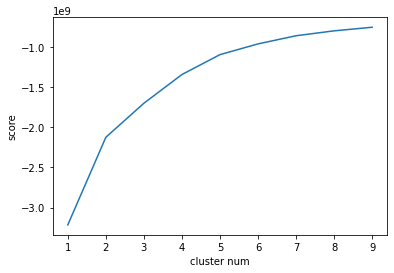

In [18]:
#plot the score variations against the clusters to find the elbow
plt.plot(clus_num, score)
pl.xlabel('cluster num')
pl.ylabel('score')
plt.show()

The change between 4 or maybe 5 seems like the last of the noticable changes. I will use 5 as it seems flattest after that.

### 4
k- means clustering

In [19]:
#define the k means object
k_means = KMeans(n_clusters = 5, n_jobs = -1)

In [20]:
#fit the k_means object to the data
k_means.fit(traffic_num)

Z:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=5, n_jobs=-1)

In [21]:
#fit the data from k_means to a new column called clusters
traffic_num['clusters'] = k_means.fit_predict(traffic_num)

Z:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-21-0363d9c64222>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_num['clusters'] = k_means.fit_predict(traffic_num)


In [22]:
#also adding to the original data frame for use later
traffic['clusters'] = traffic_num['clusters']

### 5
exploring results

In [23]:
#find the count of rows for each cluster
traffic_num['clusters'].value_counts()

3    598778
0    568469
1    501039
4    463816
2    411561
Name: clusters, dtype: int64

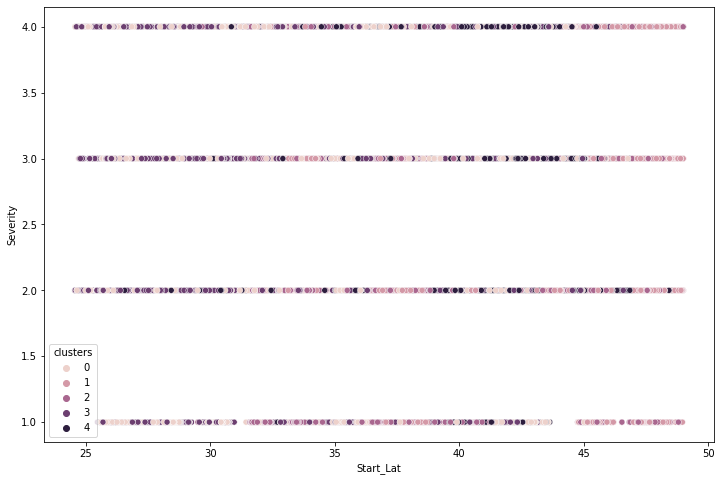

In [24]:
#plot the start lat against severty with the clusters as color
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x= traffic_num['Start_Lat'], y= traffic_num['Severity'], hue = traffic_num['clusters'])
ax.grid(False)
plt.show()

No clear segmentation for severity

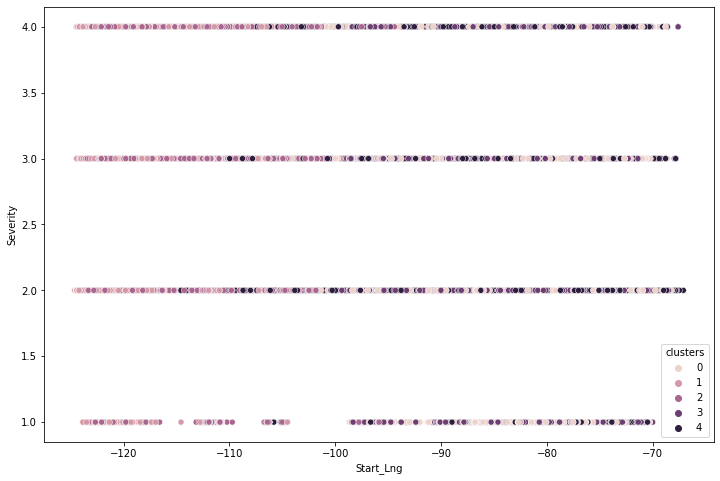

In [25]:
#plot the start lng against severity with the clusters as color
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x= traffic_num['Start_Lng'], y= traffic_num['Severity'], hue = traffic_num['clusters'])
ax.grid(False)
plt.show()

No clear segmentation for severity

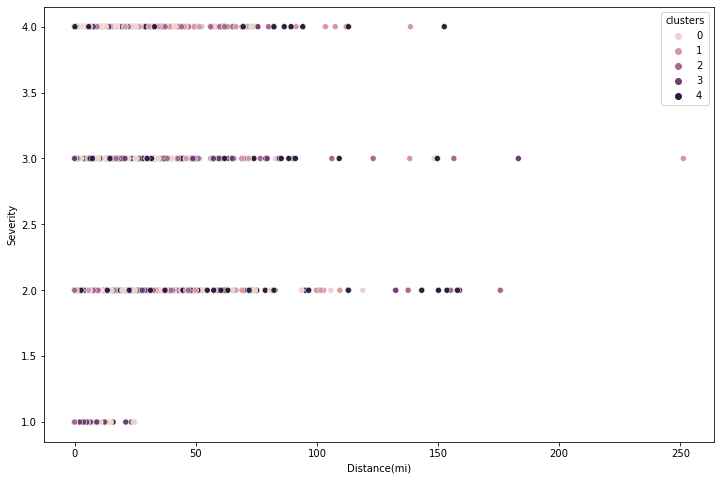

In [26]:
#plot the distance against severity with the clusters as color
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x= traffic_num['Distance(mi)'], y= traffic_num['Severity'], hue = traffic_num['clusters'])
ax.grid(False)
plt.show()

No clear segmentation for severity

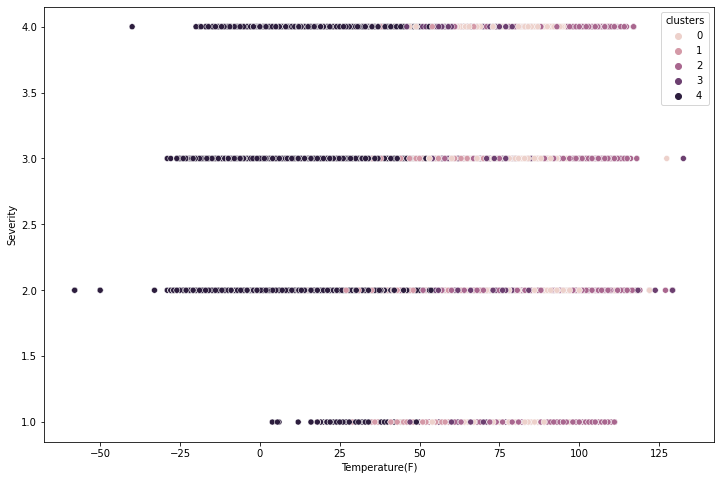

In [27]:
#plot the temp against Severity with the clusters as color
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x= traffic_num['Temperature(F)'], y= traffic_num['Severity'], hue = traffic_num['clusters'])
ax.grid(False)
plt.show()

Clusters look to be even among severity equally. But there does look to be clustering based on increase in temperature

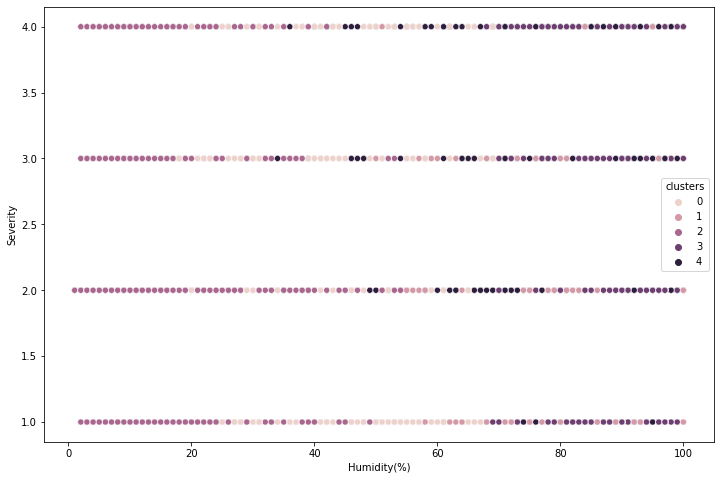

In [28]:
#plot the 'Humidity(%) against Severity with the clusters as color
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x= traffic_num['Humidity(%)'], y= traffic_num['Severity'], hue = traffic_num['clusters'])
ax.grid(False)
plt.show()

Similar to temp. Severity bands have all clusters present but they are grouped by humidity level.

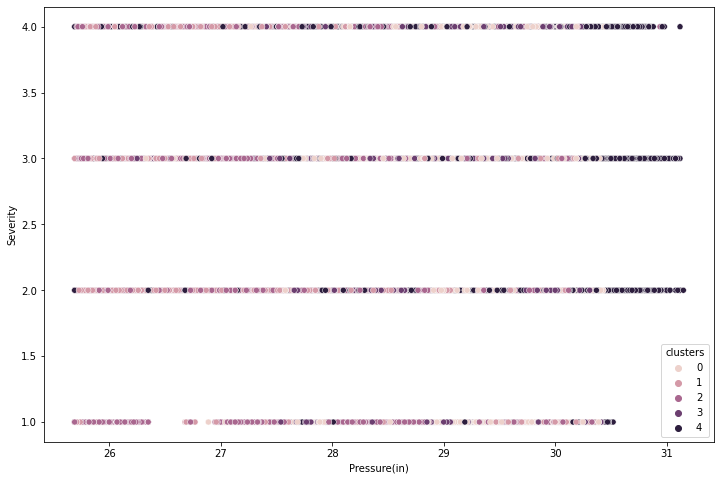

In [29]:
#plot the pressure against Severity with the clusters as color
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x= traffic_num['Pressure(in)'], y= traffic_num['Severity'], hue = traffic_num['clusters'])
ax.grid(False)
plt.show()

No clear segmentation for severity. Minor clustering based on pressure.

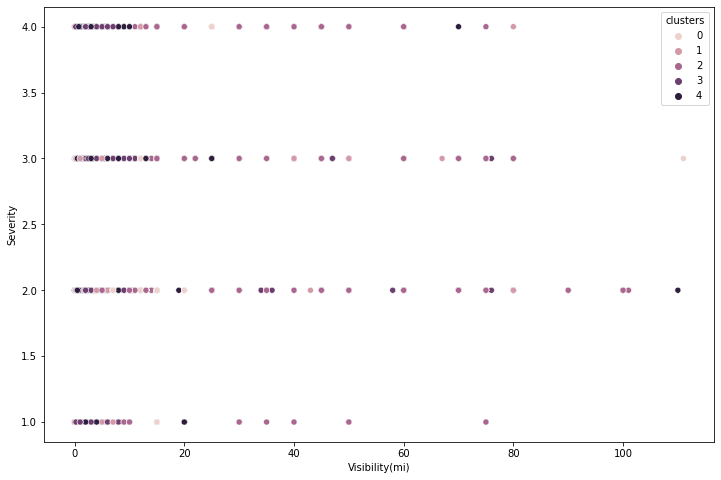

In [30]:
#plot the visbility against Severity with the clusters as color
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x= traffic_num['Visibility(mi)'], y= traffic_num['Severity'], hue = traffic_num['clusters'])
ax.grid(False)
plt.show()

No clear segmentation for severity

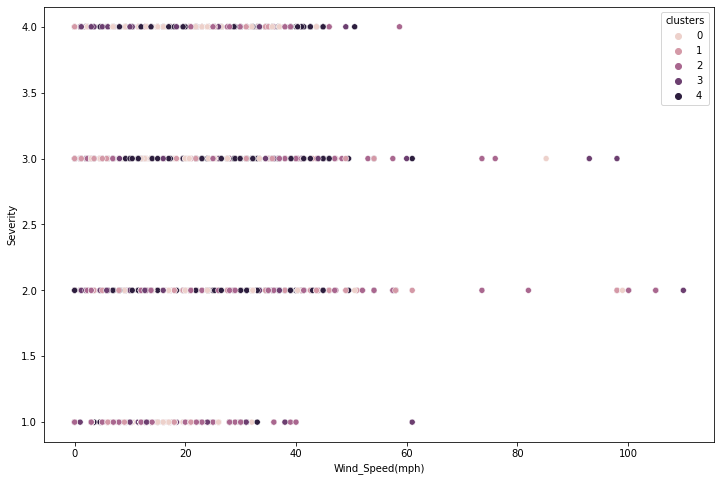

In [31]:
#plot the wind speed against Severity with the clusters as color
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x= traffic_num['Wind_Speed(mph)'], y= traffic_num['Severity'], hue = traffic_num['clusters'])
ax.grid(False)
plt.show()

No clear segmentation for severity

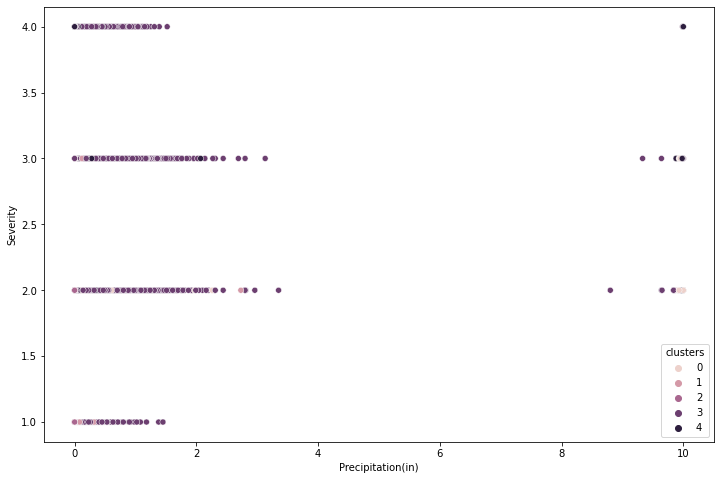

In [32]:
#plot the rain against Severity with the clusters as color
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x= traffic_num['Precipitation(in)'], y= traffic_num['Severity'], hue = traffic_num['clusters'])
ax.grid(False)
plt.show()

Seems to be completely dominated by cluster 0.

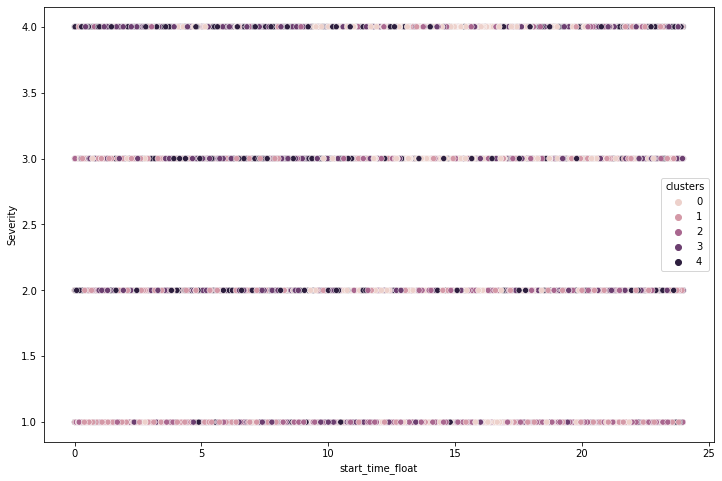

In [33]:
#plot the start time against Severity with the clusters as color
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x= traffic_num['start_time_float'], y= traffic_num['Severity'], hue = traffic_num['clusters'])
ax.grid(False)
plt.show()

No clear segmentation for severity. However, cluster 4 seems ot be more centered around early afternoon whereas the other clusters seem spread out.

In [34]:
#find the mean statistics for each cluster
traffic_num_mean = traffic_num.groupby('clusters').agg({'Severity':['mean'],
                       'Start_Lat':['mean'],
                       'Start_Lng':['mean'],
                       'Distance(mi)':['mean'],
                       'Temperature(F)':['mean'],
                       'Humidity(%)':['mean'],
                       'Pressure(in)':['mean'],
                       'Visibility(mi)':['mean'],
                       'Wind_Speed(mph)':['mean'],
                       'Precipitation(in)':['mean'],
                       'start_time_float':['mean']})
print(traffic_num_mean)

          Severity  Start_Lat   Start_Lng Distance(mi) Temperature(F)  \
              mean       mean        mean         mean           mean   
clusters                                                                
0         2.332616  35.360607  -84.050758     0.377794      73.732249   
1         2.197693  37.952797 -119.591283     0.304010      54.631761   
2         2.196445  36.087654 -115.900615     0.313306      73.445450   
3         2.306484  34.281386  -83.962784     0.436355      67.504653   
4         2.324146  39.673566  -84.511147     0.535118      34.982298   

         Humidity(%) Pressure(in) Visibility(mi) Wind_Speed(mph)  \
                mean         mean           mean            mean   
clusters                                                           
0          49.617921    29.805814       9.971786        9.379385   
1          75.315415    29.691876       8.801979        6.016164   
2          31.986901    29.483635      10.101390        7.953078   
3      

In [35]:
#find the median statistics for each cluster
traffic_num_med = traffic_num.groupby('clusters').agg({'Severity':['median'],
                       'Start_Lat':['median'],
                       'Start_Lng':['median'],
                       'Distance(mi)':['median'],
                       'Temperature(F)':['median'],
                       'Humidity(%)':['median'],
                       'Pressure(in)':['median'],
                       'Visibility(mi)':['median'],
                       'Wind_Speed(mph)':['median'],
                       'Precipitation(in)':['median'],
                       'start_time_float':['median']})
print(traffic_num_med)

         Severity  Start_Lat   Start_Lng Distance(mi) Temperature(F)  \
           median     median      median       median         median   
clusters                                                               
0               2  35.243622  -82.281250         0.00           76.0   
1               2  37.487680 -120.082130         0.00           55.4   
2               2  34.170063 -117.997912         0.00           73.0   
3               2  34.072643  -82.045480         0.00           69.0   
4               2  40.627380  -83.652977         0.01           36.1   

         Humidity(%) Pressure(in) Visibility(mi) Wind_Speed(mph)  \
              median       median         median          median   
clusters                                                           
0               51.0        29.94           10.0             9.0   
1               75.0        29.90           10.0             5.8   
2               32.0        29.85           10.0             7.0   
3              

In [36]:
#set the variables for the map
mean_lat_0 = traffic_num_mean.loc[0,'Start_Lat']
mean_lon_0 = traffic_num_mean.loc[0,'Start_Lng']
med_lat_0 = traffic_num_med.loc[0,'Start_Lat']
med_lon_0 = traffic_num_med.loc[0,'Start_Lng']
mean_lat_1 = traffic_num_mean.loc[1,'Start_Lat']
mean_lon_1 = traffic_num_mean.loc[1,'Start_Lng']
med_lat_1 = traffic_num_med.loc[1,'Start_Lat']
med_lon_1 = traffic_num_med.loc[1,'Start_Lng']
mean_lat_2 = traffic_num_mean.loc[2,'Start_Lat']
mean_lon_2 = traffic_num_mean.loc[2,'Start_Lng']
med_lat_2 = traffic_num_med.loc[2,'Start_Lat']
med_lon_2 = traffic_num_med.loc[2,'Start_Lng']
mean_lat_3 = traffic_num_mean.loc[3,'Start_Lat']
mean_lon_3 = traffic_num_mean.loc[3,'Start_Lng']
med_lat_3 = traffic_num_med.loc[3,'Start_Lat']
med_lon_3 = traffic_num_med.loc[3,'Start_Lng']
mean_lat_4 = traffic_num_mean.loc[4,'Start_Lat']
mean_lon_4 = traffic_num_mean.loc[4,'Start_Lng']
med_lat_4 = traffic_num_med.loc[4,'Start_Lat']
med_lon_4 = traffic_num_med.loc[4,'Start_Lng']

In [37]:
#create map of average and median lat and long for each cluster. these are hardcoded from mean and median cluster statistcs below



avg_lat_lon = folium.Map(location = [40,-100], zoom_start = 3.5)

folium.Marker(
    location=[mean_lat_0, mean_lon_0],
    popup='0 mean',
    icon=folium.Icon(color='red')
).add_to(avg_lat_lon)

folium.Marker(
    location=[med_lat_0, med_lon_0],
    popup='0 med',
    icon=folium.Icon(color='red')
).add_to(avg_lat_lon)

folium.Marker(
    location=[mean_lat_1, mean_lon_1],
    popup='1 mean',
    icon=folium.Icon(color='green')
).add_to(avg_lat_lon)

folium.Marker(
    location=[med_lat_1, med_lon_1],
    popup='1 med',
    icon=folium.Icon(color='green')
).add_to(avg_lat_lon)

folium.Marker(
    location=[mean_lat_2, mean_lon_2],
    popup='2 mean',
    icon=folium.Icon(color='blue')
).add_to(avg_lat_lon)

folium.Marker(
    location=[med_lat_2, med_lon_2],
    popup='2 med',
    icon=folium.Icon(color='blue')
).add_to(avg_lat_lon)

folium.Marker(
    location=[mean_lat_3, mean_lon_3],
    popup='3 mean',
    icon=folium.Icon(color='orange')
).add_to(avg_lat_lon)

folium.Marker(
    location=[med_lat_3, med_lon_3],
    popup='3 med',
    icon=folium.Icon(color='orange')
).add_to(avg_lat_lon)

folium.Marker(
    location=[mean_lat_4, mean_lon_4],
    popup='4 mean',
    icon=folium.Icon(color='darkpurple')
).add_to(avg_lat_lon)

folium.Marker(
    location=[med_lat_4, med_lon_4],
    popup='4 med',
    icon=folium.Icon(color='darkpurple')
).add_to(avg_lat_lon)

avg_lat_lon

I suspected that since a lot of the numerical values were weather related, then the clusters would have similar latitude and longitude values where weather was more similar.
This does not appear to be the case. While Southern California and Northern California have very different weather, The difference between Tennessee, Georgia, and South Carolina is much less.

## 6
Exporting data

In [38]:
#export data
traffic.to_csv(os.path.join(path, 'Data', 'Prepared', 'v5_data_post_clustering.csv'))